<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/AXELDAVID_1103210017_TK4504_SKLEARN_CLUSTERING_MALL_CUSTOMERS_MEAN_SHIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
SKLearn Clustering<br>


# Import Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from google.colab import drive
import zipfile

# Import Dataset

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json

In [22]:
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/mall-customers.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [24]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [27]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender_Male'].astype(int)

In [28]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
Gender                    int64
dtype: object

Number of estimated clusters: 1


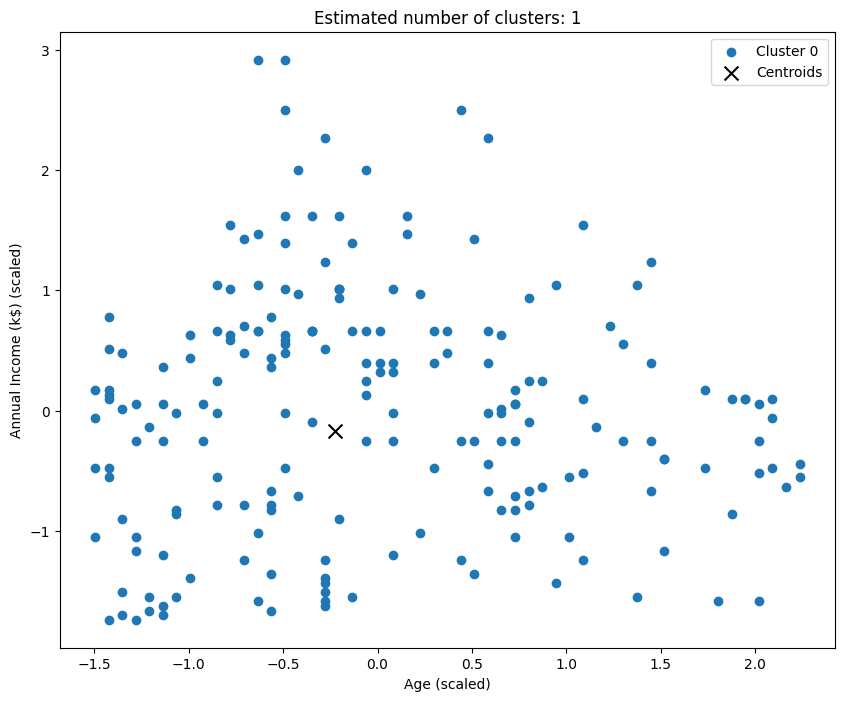

In [29]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Number of estimated clusters: %d" % n_clusters_)

plt.figure(figsize=(10, 8))

for k in range(n_clusters_):
    cluster_center = cluster_centers[k]
    cluster_points = X_scaled[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (k$) (scaled)')
plt.legend()
plt.show()
